In [3]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
model = tf.keras.models.load_model('trained_model.keras') 

In [6]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

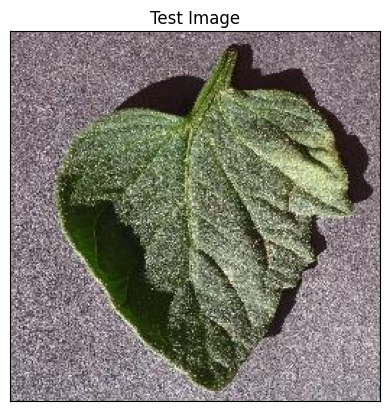

In [29]:
import cv2
image_path = "test/test/TomatoHealthy1.JPG"
##Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [30]:
##Testing Model

In [31]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [32]:
prediction = model.predict(input_arr)   
prediction,prediction.shape

1/1 [==============================] - 0s 11ms/step


(array([[1.07188090e-17, 2.97029176e-17, 2.39591905e-17, 1.11769144e-11,
         1.30920006e-16, 2.04496687e-15, 3.61703417e-18, 1.18594820e-17,
         1.29796599e-17, 1.27331621e-19, 4.81995364e-17, 3.04828455e-21,
         1.35790883e-16, 1.34975657e-20, 1.09052560e-20, 1.05937596e-19,
         6.79182595e-19, 9.31052332e-20, 4.08034948e-20, 1.51923168e-16,
         5.96739943e-13, 3.90453651e-18, 1.10332785e-16, 1.98838668e-17,
         6.08894928e-17, 2.96864394e-13, 2.16641456e-18, 1.80254392e-15,
         3.65891324e-20, 5.23398409e-18, 2.94869516e-13, 6.61244952e-15,
         5.57661590e-15, 1.54974048e-15, 3.65040154e-09, 3.14839837e-20,
         2.74380818e-21, 1.00000000e+00]], dtype=float32),
 (1, 38))

In [33]:
result_index = np.argmax(prediction)
result_index

37

In [34]:
class_name=['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

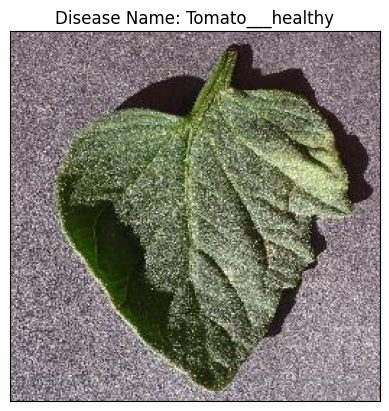

In [35]:
#Displaying Result of  Disease Prediction 
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show() 